In [ ]:
!nvidia-smi

Sun Jun 25 17:12:15 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.1/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
100% 6.23M/6.23M [00:00<00:00, 153MB/s]

2023-06-25 17:13:02.799829: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-25 17:13:03.635503: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
100% 104k/104k [00:00<00:00, 108MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 118.8ms
Speed: 0.8ms pre-process, 118.8ms inference, 335.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


/content


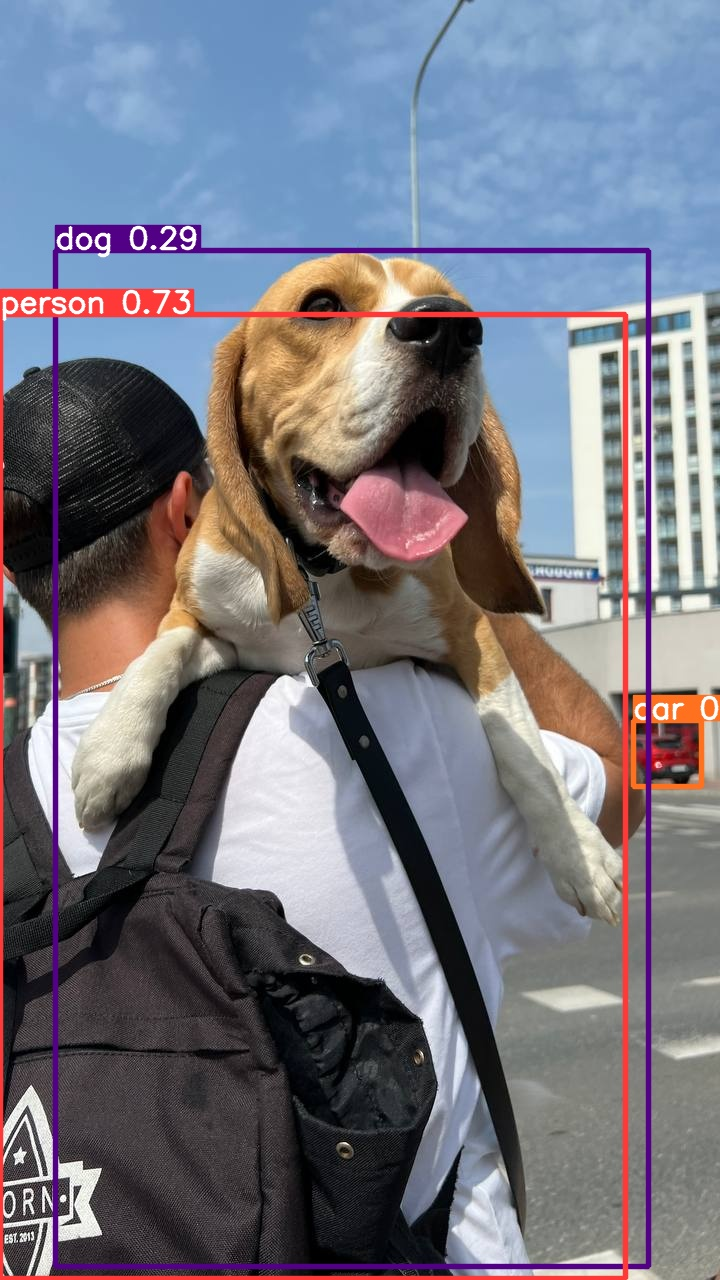

In [ ]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

In [ ]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg


In [ ]:
results[0].boxes.xyxy

tensor([[   0.,  314.,  625., 1278.],
        [  55.,  250.,  648., 1266.],
        [ 633.,  720.,  701.,  786.]], device='cuda:0')

In [ ]:
results[0].boxes.conf

tensor([0.72713, 0.29066, 0.28456], device='cuda:0')

In [ ]:
results[0].boxes.cls

tensor([ 0., 16.,  2.], device='cuda:0')

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="4hcMhArALJwWNtDdJ5DF")
project = rf.workspace("aakansha-jagga-cwmw8").project("plant-disease-detector")
dataset = project.version(1).download("yolov8")


/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...

Extracting Dataset Version Zip to Plant-Disease-Detector-1 in yolov8:: 100%|██████████| 7398/7398 [00:02<00:00, 3294.60it/s]


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=1 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 305MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/Plant-Disease-Detector-1/data.yaml, epochs=1, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript,

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    train_batch0.jpg
confusion_matrix.png				    train_batch1.jpg
events.out.tfevents.1687713373.8a7596780fe0.1881.0  train_batch2.jpg
F1_curve.png					    val_batch0_labels.jpg
P_curve.png					    val_batch0_pred.jpg
PR_curve.png					    val_batch1_labels.jpg
R_curve.png					    val_batch1_pred.jpg
results.csv					    weights
results.png


/content


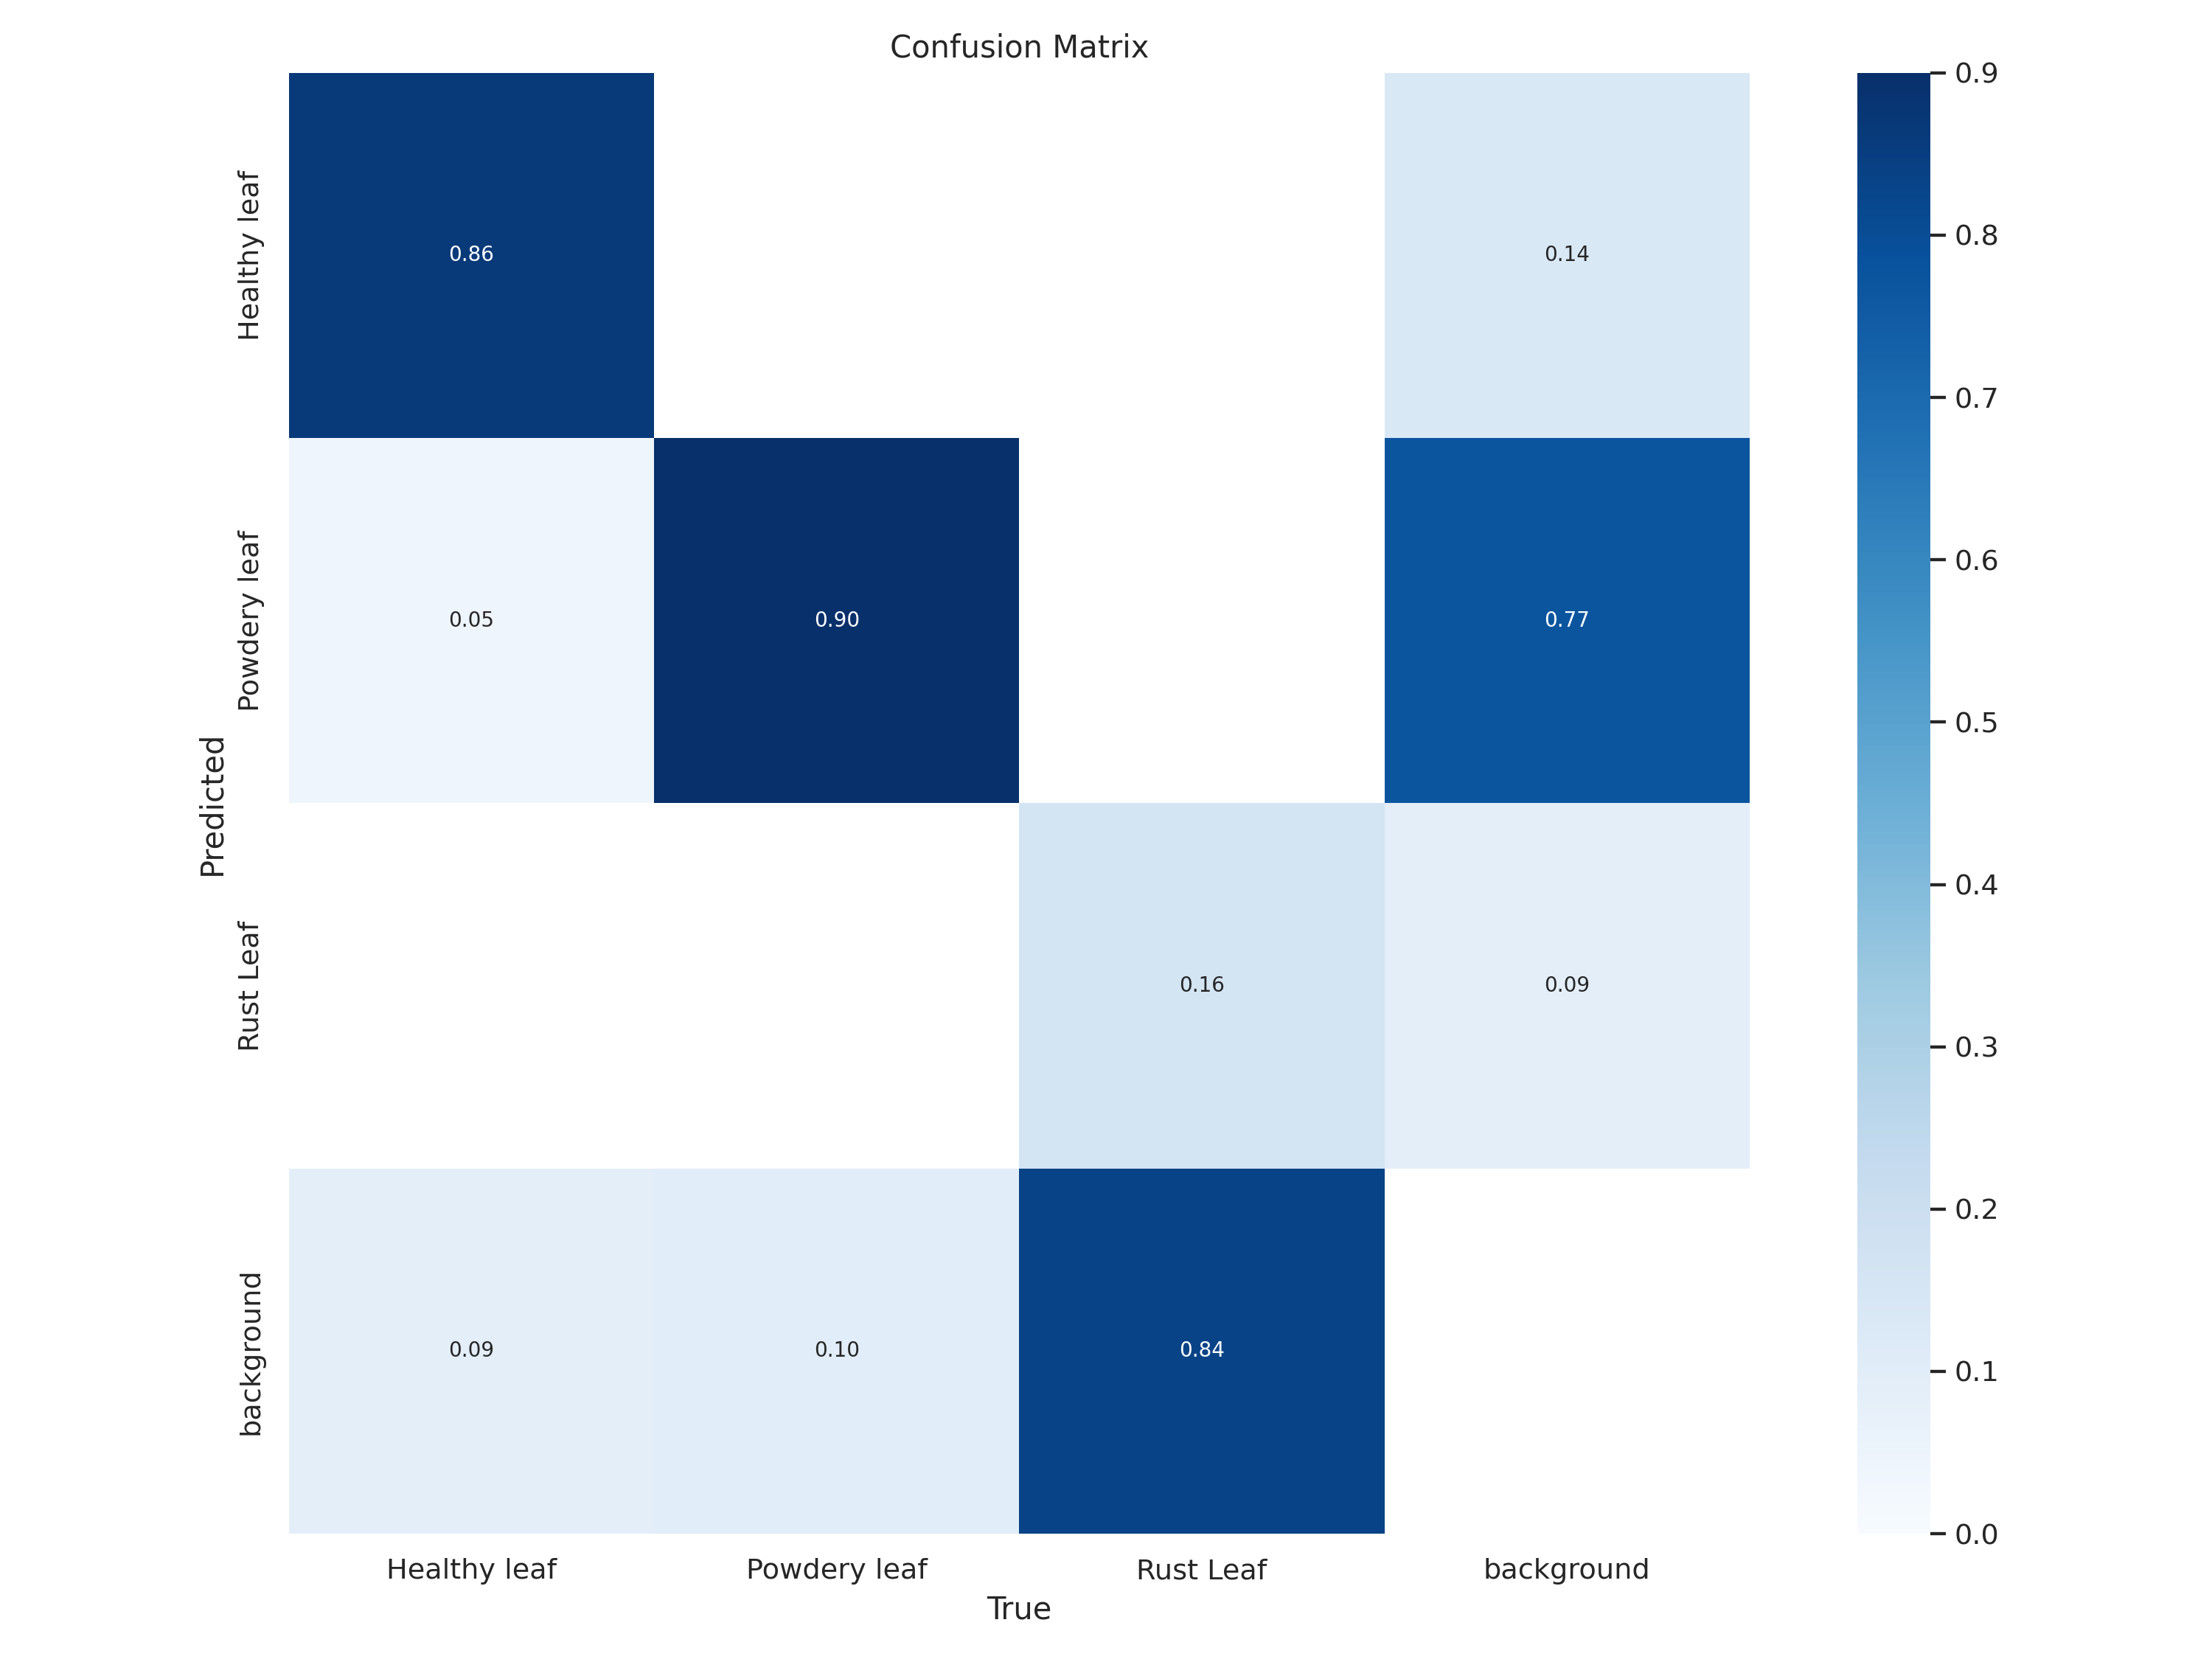

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


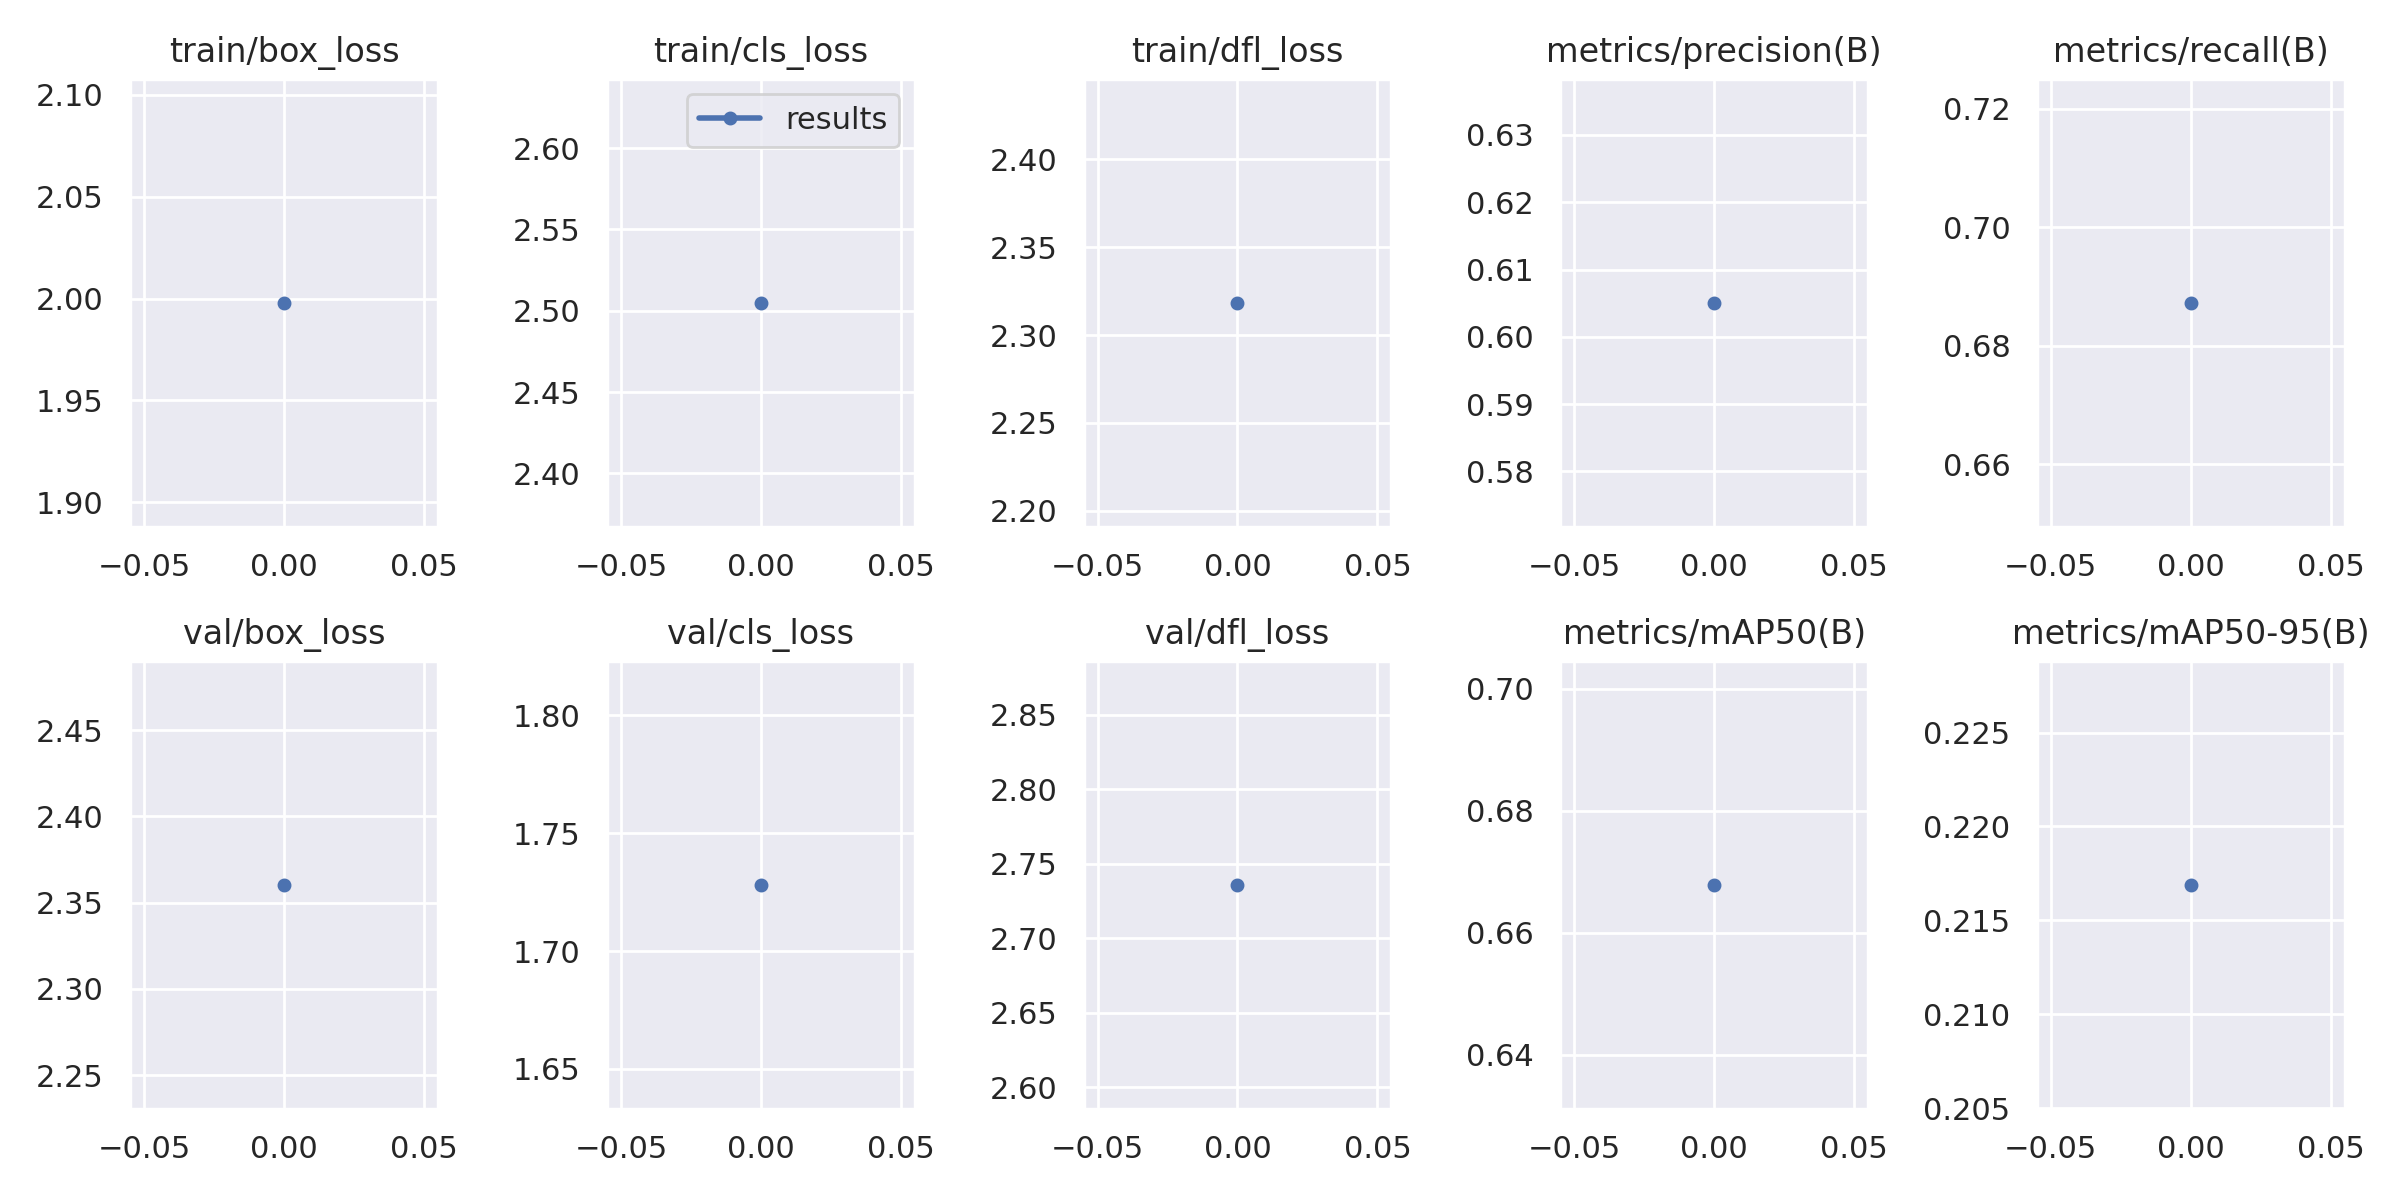

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


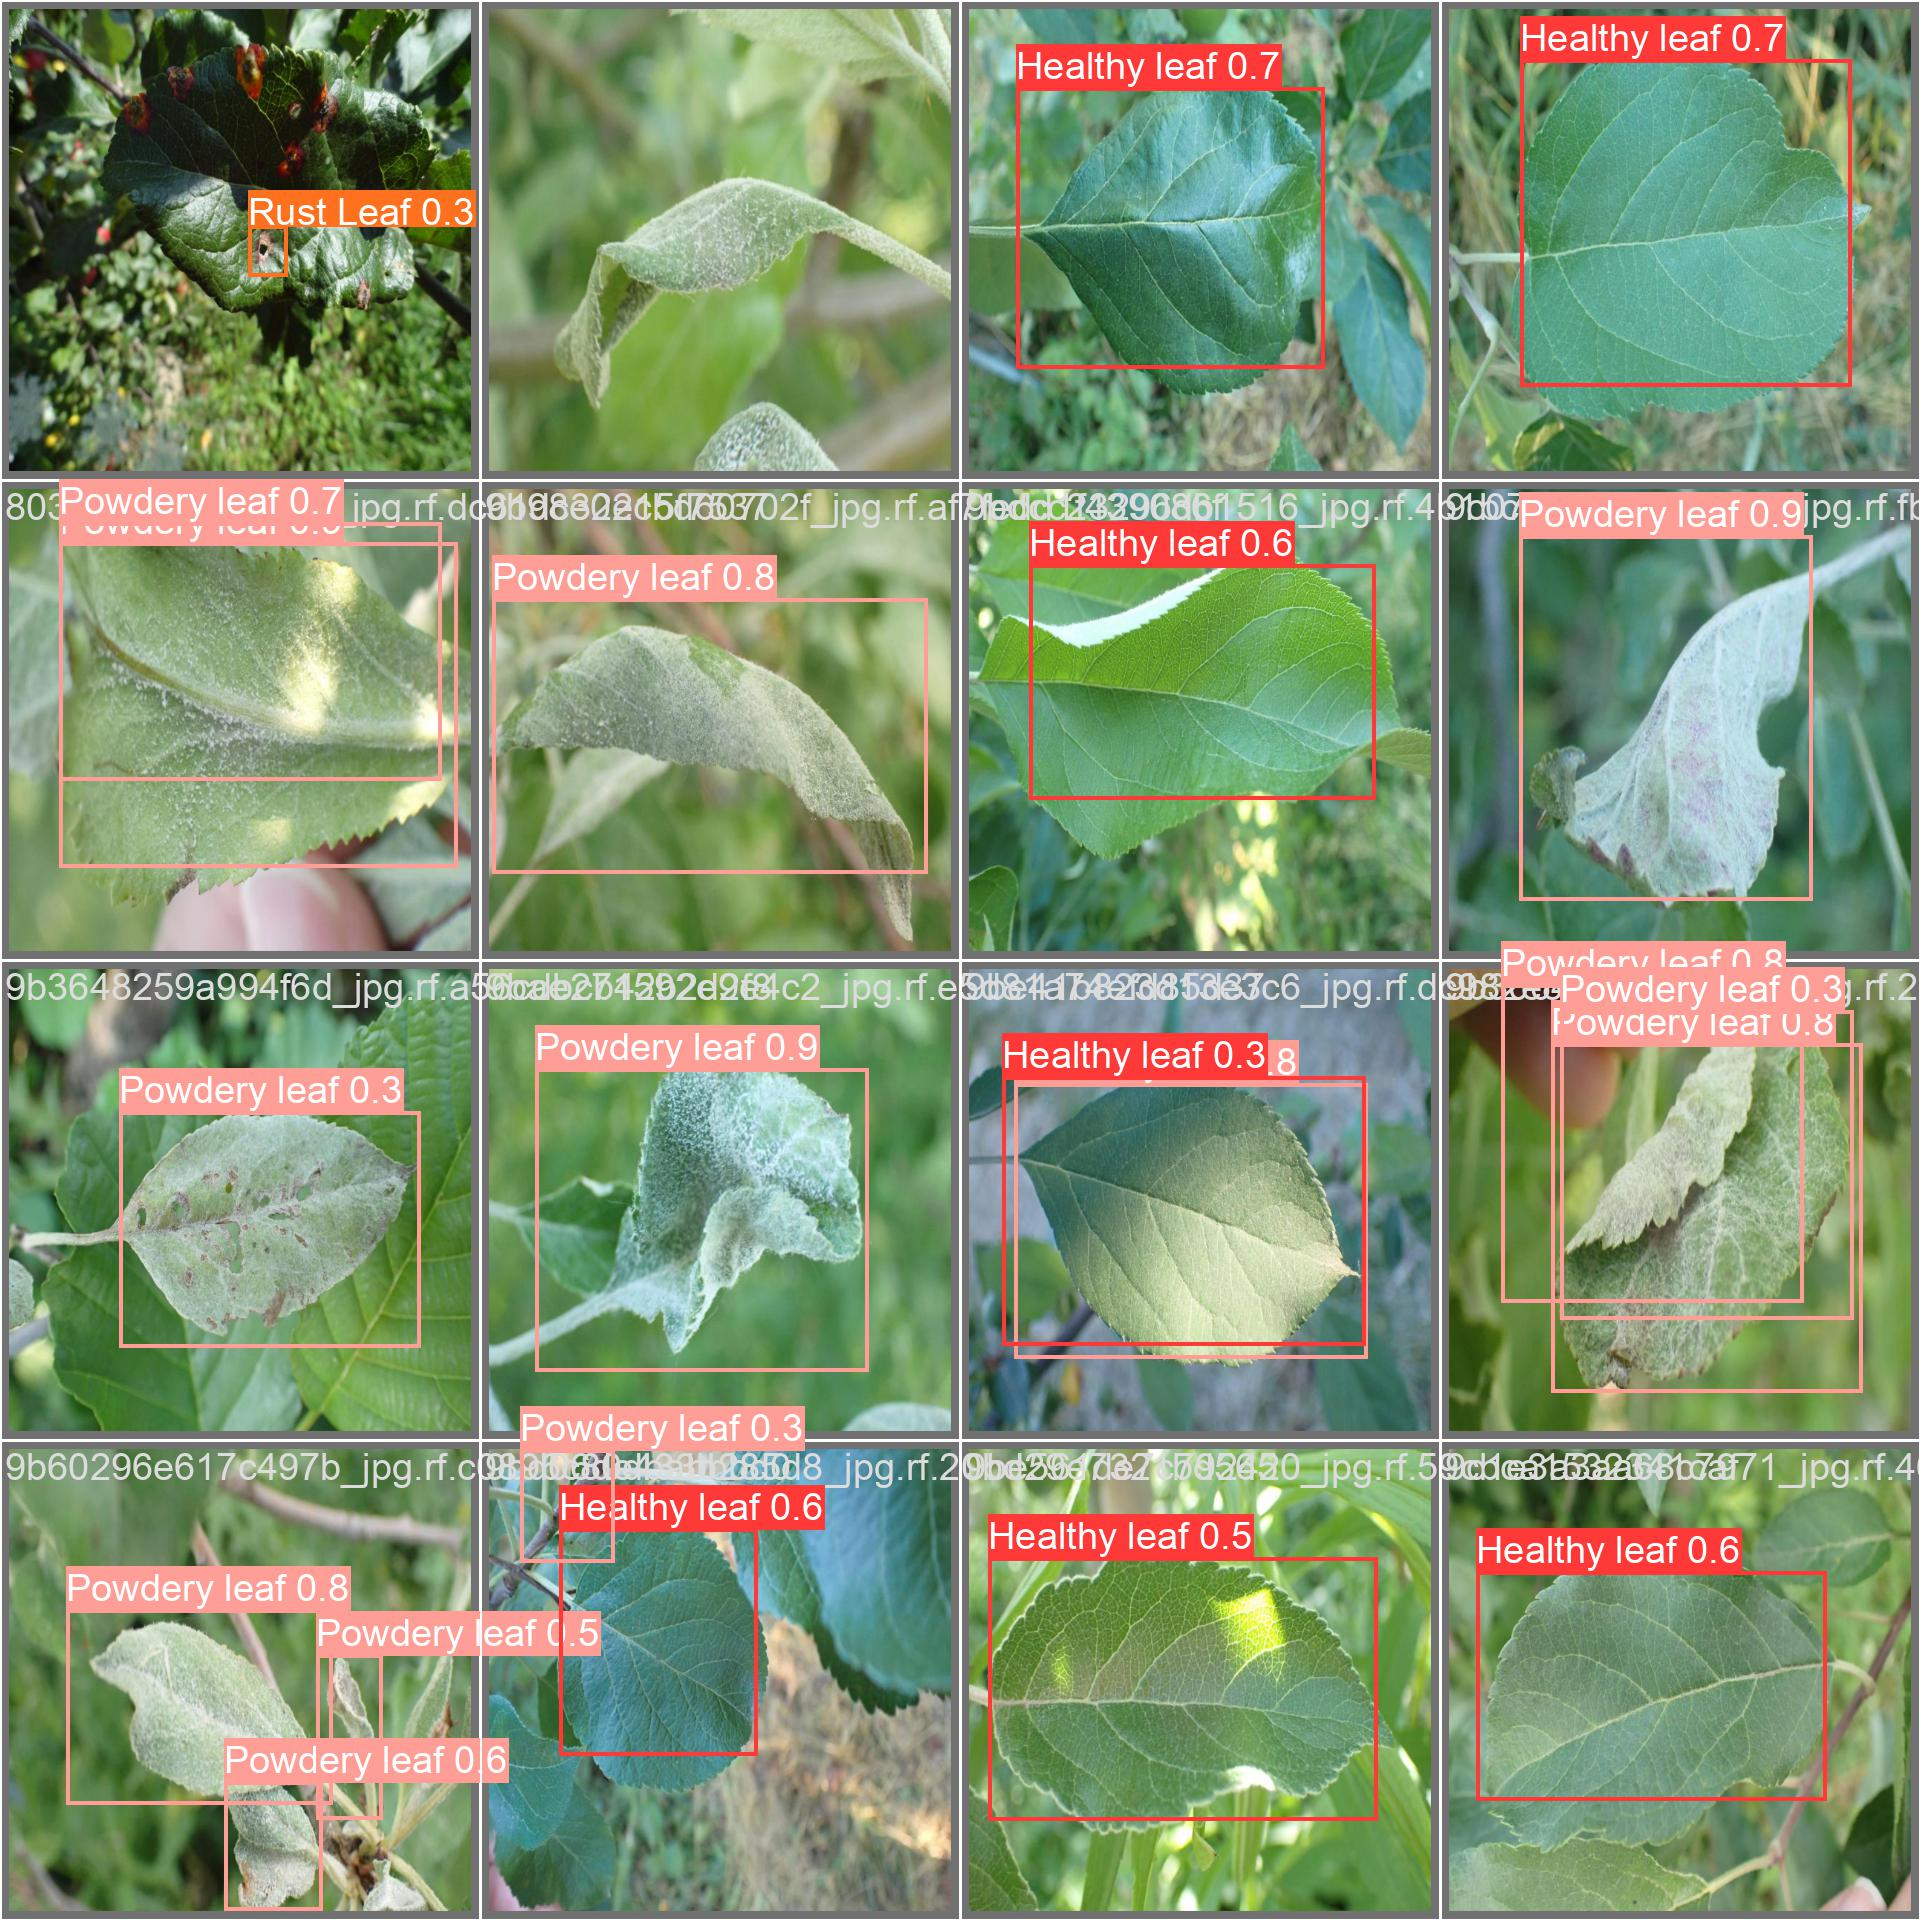

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-06-25 17:20:35.677230: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Plant-Disease-Detector-1/valid/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100% 60/60 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:04<00:00,  1.14s/it]
                   all         60         97      0.604      0.682      0.668      0.218
          Healthy leaf         60         22      0.892      0.909      0.934      0.306
          Powdery leaf         60         20      0.399        0.9      0.737      0.232
             Rust Leaf         60         55      0.522      0.238      0.332      0.116
Speed: 9.6ms pre-process, 22.0ms inference, 0.0ms loss, 7.7ms post-process 

## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
2023-06-25 17:20:54.249612: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
image 1/100 /content/datasets/Plant-Disease-Detector-1/test/images/82add70df6ab2854_jpg.rf.9bccebbe280ac3c36e977c2bc2af8e89.jpg: 800x800 1 Rust Leaf, 24.6ms
image 2/100 /content/datasets/Plant-Disease-Detector-1/test/images/82f49a4a7b9585f1_jpg.rf.88650873e7ab1f07c0a29f94d9ed4c3b.jpg: 800x800 2 Rust Leafs, 24.6ms
image 3/100 /content/datasets/Plant-Disease-Detector-1/test/images/830f26cc6d3cd13e_jpg.rf.9cc59d488b26c68b4be3689660def21d.jpg: 800x800 24.6ms
image 4/100 /content/datasets/Plant-Disease-Detector-1/test/images/831abdc76c05e23d_jpg.rf.74d294d21f1313c30d29665529c34c28.jpg: 800x800 24.6ms
image 5/100 /content/datasets/Plant-Disease-Detector-1/test/images/83a75e2de0cb984b_jpg.rf.afbc0

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/content/runs/detect/predict2/prediction')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

An error occured when getting the model upload URL: This version already has a trained model. Please generate and train a new version in order to upload model to Roboflow.


/content


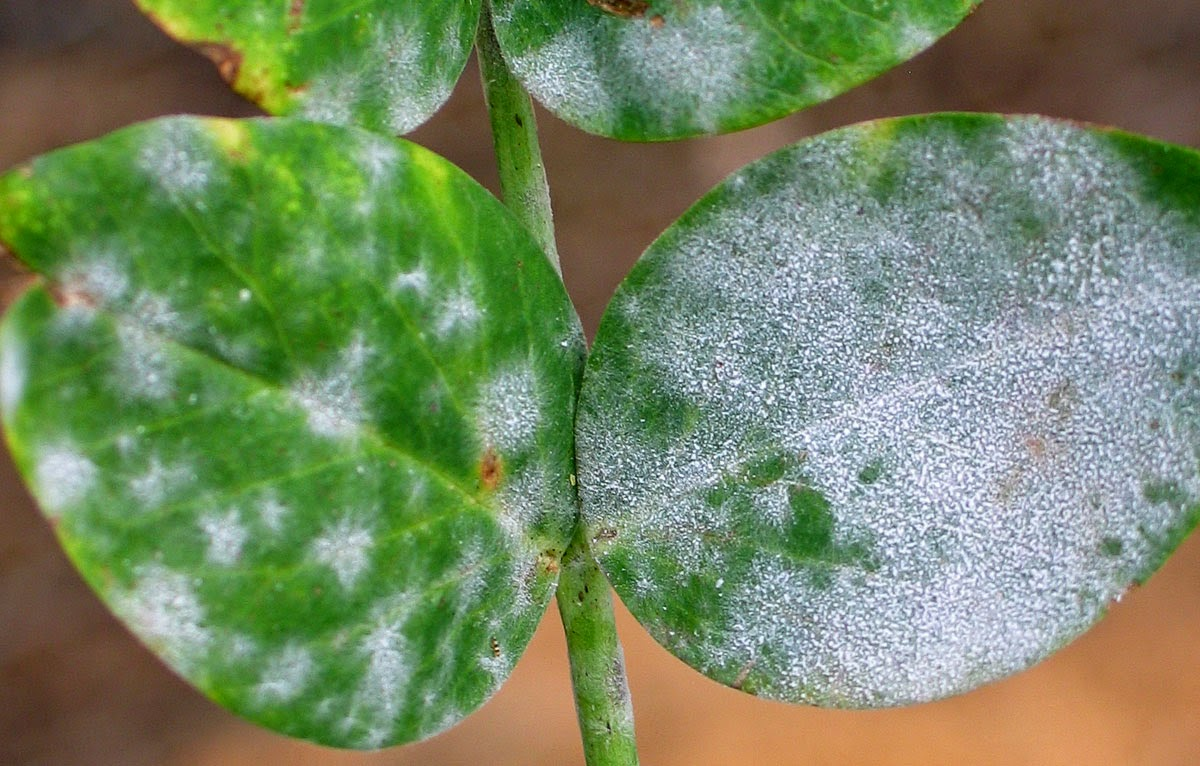

In [ ]:
%cd {HOME}
Image(filename='/content/sample.jpeg', height=300)

loading Roboflow workspace...
loading Roboflow project...
{'predictions': [{'x': 861, 'y': 436, 'width': 676, 'height': 598, 'confidence': 0.507369875907898, 'class': 'Powdery leaf', 'image_path': '/content/sample.jpeg', 'prediction_type': 'ObjectDetectionModel'}, {'x': 757, 'y': 62, 'width': 521, 'height': 124, 'confidence': 0.14297354221343994, 'class': 'Powdery leaf', 'image_path': '/content/sample.jpeg', 'prediction_type': 'ObjectDetectionModel'}, {'x': 699, 'y': 59, 'width': 412, 'height': 118, 'confidence': 0.10492566227912903, 'class': 'Rust Leaf', 'image_path': '/content/sample.jpeg', 'prediction_type': 'ObjectDetectionModel'}, {'x': 378, 'y': 431, 'width': 738, 'height': 597, 'confidence': 0.0629042387008667, 'class': 'Powdery leaf', 'image_path': '/content/sample.jpeg', 'prediction_type': 'ObjectDetectionModel'}, {'x': 266, 'y': 63, 'width': 453, 'height': 126, 'confidence': 0.012851446866989136, 'class': 'Rust Leaf', 'image_path': '/content/sample.jpeg', 'prediction_type': '

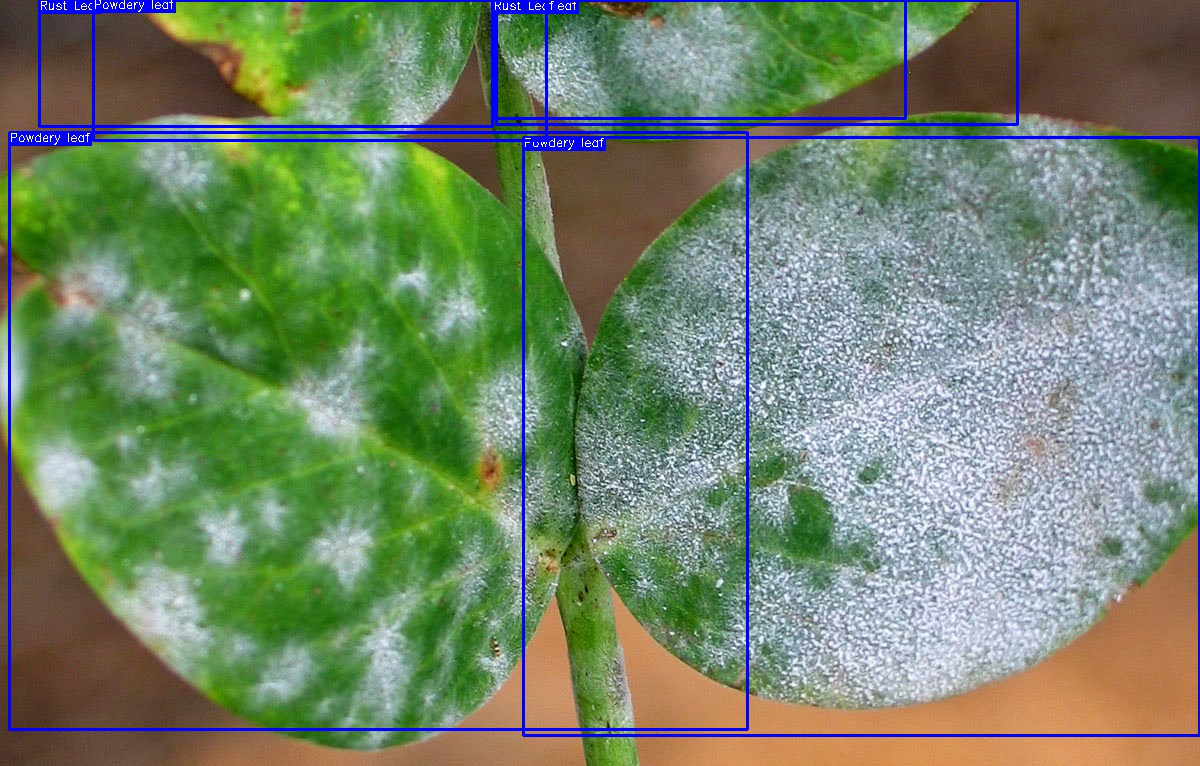

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="4hcMhArALJwWNtDdJ5DF")
project = rf.workspace().project("plant-disease-detector")
model = project.version(1).model

print(model.predict("/content/sample.jpeg", confidence=1, overlap=40).json())

model.predict("/content/sample.jpeg", confidence=1, overlap=40).save("prediction.jpg")
from PIL import Image
img = Image.open("/content/prediction.jpg")
img.show()